<a href="https://colab.research.google.com/github/kellyneves781/redes_neurais3/blob/main/Redes_Neurais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Introdução

In [3]:
import kagglehub
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Download latest version
path = kagglehub.dataset_download("fedesoriano/stellar-classification-dataset-sdss17")

print("Path to dataset files:", path)

df: pd.DataFrame = pd.read_csv(path + "/star_classification.csv")
df.head()

Path to dataset files: /kaggle/input/stellar-classification-dataset-sdss17


,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

Como a coluna class tem dados categóricos, precisamos trasnformar em numéricos.

In [5]:
df_encoded = pd.get_dummies(df, columns=['class'])
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'bool':
        df_encoded[col] = df_encoded[col].astype(int)

df_encoded.info()
df_encoded.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   obj_ID        100000 non-null  float64
 1   alpha         100000 non-null  float64
 2   delta         100000 non-null  float64
 3   u             100000 non-null  float64
 4   g             100000 non-null  float64
 5   r             100000 non-null  float64
 6   i             100000 non-null  float64
 7   z             100000 non-null  float64
 8   run_ID        100000 non-null  int64  
 9   rerun_ID      100000 non-null  int64  
 10  cam_col       100000 non-null  int64  
 11  field_ID      100000 non-null  int64  
 12  spec_obj_ID   100000 non-null  float64
 13  redshift      100000 non-null  float64
 14  plate         100000 non-null  int64  
 15  MJD           100000 non-null  int64  
 16  fiber_ID      100000 non-null  int64  
 17  class_GALAXY  100000 non-null  int64  
 18  class

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID,class_GALAXY,class_QSO,class_STAR
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,0.634794,5812,56354,171,1,0,0
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,0.779136,10445,58158,427,1,0,0
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,0.644195,4576,55592,299,1,0,0
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,0.932346,9149,58039,775,1,0,0
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,0.116123,6121,56187,842,1,0,0


A distribuição da classificação é desbalanceada, pois há muitos dados classificados como Galáxias

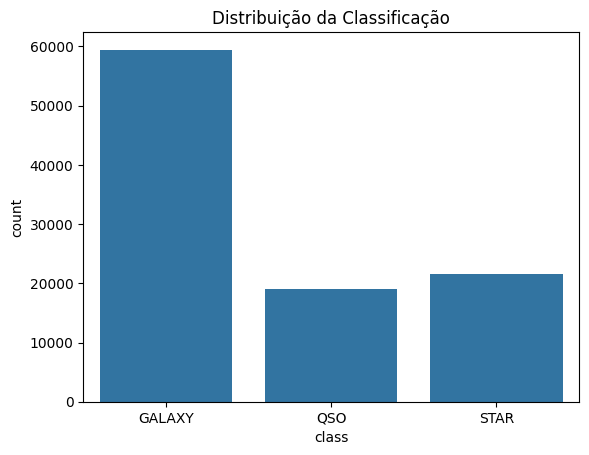

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='class', data=df)
plt.title('Distribuição da Classificação')
plt.show()

Feito isso vamos iniciar a criação das redes neurais.

Vamos retirar a coluna de identificação, obj_ID, porque não é útil para o treinamento do modelo.

In [7]:
df_encoded.drop(columns=['obj_ID'], inplace=True)
df_encoded.head()

,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID,class_GALAXY,class_QSO,class_STAR
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,0.634794,5812,56354,171,1,0,0
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,0.779136,10445,58158,427,1,0,0
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,0.644195,4576,55592,299,1,0,0
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,0.932346,9149,58039,775,1,0,0
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,0.116123,6121,56187,842,1,0,0


In [8]:
# Codificar as classes como one-hot para preparar, mas depois usaremos só o índice
df_encoded = pd.get_dummies(df, columns=['class'])
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'bool':
        df_encoded[col] = df_encoded[col].astype(int)

# Separar features e labels
X = df_encoded.drop(columns=['class_GALAXY', 'class_QSO', 'class_STAR']).values
y = df[['class']].values.ravel()  # Mantemos a coluna original para extrair índices

# Mapear classes para índices
class_mapping = {'GALAXY': 0, 'QSO': 1, 'STAR': 2}
y_indices = np.vectorize(class_mapping.get)(y)  # Mapeia as strings para índices 0,1,2

# Escalonar as features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir treino e teste
X_train_np, X_test_np, y_train_np, y_test_np = train_test_split(
    X_scaled, y_indices, test_size=0.2, random_state=42
)

# Converter para tensores PyTorch
X_train = torch.from_numpy(X_train_np.astype(np.float32))
y_train = torch.from_numpy(y_train_np.astype(np.longlong))  # CrossEntropyLoss requer long
X_test = torch.from_numpy(X_test_np.astype(np.float32))
y_test = torch.from_numpy(y_test_np.astype(np.longlong))

# Criar DataLoader
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)

Vamos criar uma rede com 32 neurônios de entrada, 16 neurônios na camada oculta 2 e saída com 3 classes.

Para função de custo foi utilizada o critário CrossEntropyLoss, que é útil na classificação multi-classe, e o otimizador Adam, que ajusta os pesos de cada parametro para minimizar a função de perda.

Com a utilização de 100 épocas o modelo aprendeu bem logo na primeira, com boa acurácia e uma boa diminuição da função de perda, ou seja, não há underfitting. O modelo chegou a 97% de acurácia já no terceiro treinamento e se manteve perto desse valor nas épocas seguintes.

Epoch [10/100], Loss: 0.1103, Train Accuracy: 0.9672
Epoch [20/100], Loss: 0.1039, Train Accuracy: 0.9683
Epoch [30/100], Loss: 0.0992, Train Accuracy: 0.9695
Epoch [40/100], Loss: 0.0977, Train Accuracy: 0.9701
Epoch [50/100], Loss: 0.0957, Train Accuracy: 0.9711
Epoch [60/100], Loss: 0.0938, Train Accuracy: 0.9714
Epoch [70/100], Loss: 0.0934, Train Accuracy: 0.9713
Epoch [80/100], Loss: 0.0925, Train Accuracy: 0.9715
Epoch [90/100], Loss: 0.0912, Train Accuracy: 0.9716
Epoch [100/100], Loss: 0.0907, Train Accuracy: 0.9722

Acurácia no conjunto de teste: 0.9663


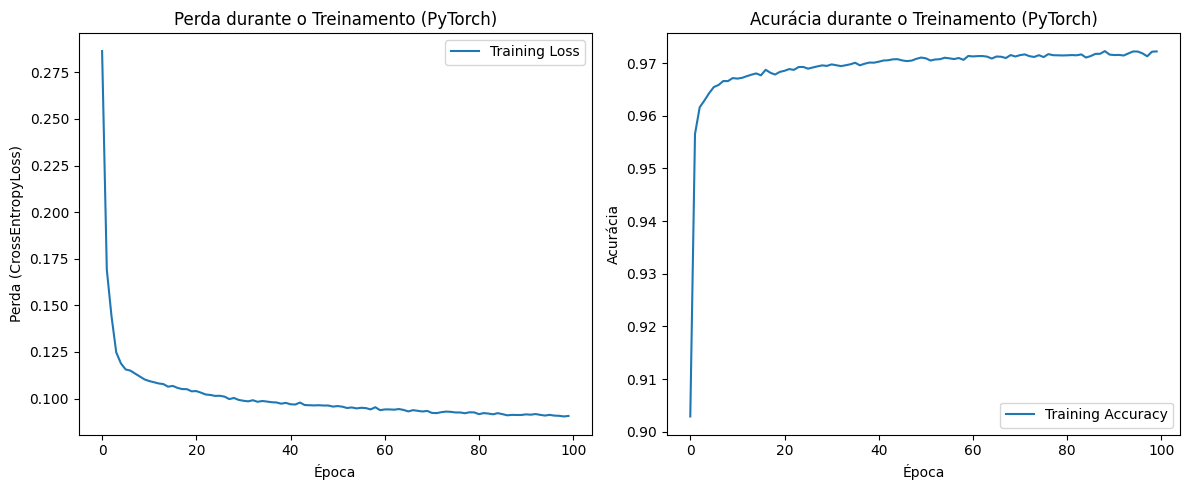

In [9]:
# 2. Definir o modelo
input_features = X_train.shape[1]
num_classes = len(class_mapping)

class StellarClassifier(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(StellarClassifier, self).__init__()
        self.layer1 = nn.Linear(input_dim, 32)
        self.relu1 = nn.ReLU()
        self.layer2 = nn.Linear(32, 16)
        self.relu2 = nn.ReLU()
        self.output_layer = nn.Linear(16, num_classes)  # Sem softmax!

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu1(x)
        x = self.layer2(x)
        x = self.relu2(x)
        x = self.output_layer(x)
        return x

model = StellarClassifier(input_features, num_classes)

# 3. Função de custo e otimizador
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 4. Loop de treinamento
num_epochs = 100
train_losses = []
train_accuracies = []

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item() * inputs.size(0)

        _, predicted_indices = torch.max(outputs, 1)
        correct_train += (predicted_indices == labels).sum().item()
        total_train += labels.size(0)

    avg_epoch_loss = epoch_loss / len(train_loader.dataset)
    epoch_accuracy_train = correct_train / total_train
    train_losses.append(avg_epoch_loss)
    train_accuracies.append(epoch_accuracy_train)

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_epoch_loss:.4f}, Train Accuracy: {epoch_accuracy_train:.4f}")

# 5. Avaliar o modelo
model.eval()
with torch.no_grad():
    outputs = model(X_test)
    _, y_predicted_cls = torch.max(outputs, 1)
    accuracy = (y_predicted_cls == y_test).sum().item() / len(y_test)
    print(f"\nAcurácia no conjunto de teste: {accuracy:.4f}")

# 6. Plotar perda e acurácia
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.title('Perda durante o Treinamento (PyTorch)')
plt.xlabel('Época')
plt.ylabel('Perda (CrossEntropyLoss)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.title('Acurácia durante o Treinamento (PyTorch)')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()

plt.tight_layout()
plt.show()


Para melhor visualização do desempenho, a visualização do gráfico da validação mostra algumas diferenças em comparação ao treinamento. Na validaçãos valores de perda foram um pouco maiores e os valores de acurácia levemente menores, isso indicaria que o treinamento memorizou levemente os dados fornecidos, um sutil overfitting, mas não chegou a comprometer o desempenho do modelo.

Epoch [10/100], Train Loss: 0.0894, Train Acc: 0.9725, Val Loss: 0.0934, Val Acc: 0.9702
Epoch [20/100], Train Loss: 0.0886, Train Acc: 0.9727, Val Loss: 0.0901, Val Acc: 0.9717
Epoch [30/100], Train Loss: 0.0879, Train Acc: 0.9729, Val Loss: 0.0904, Val Acc: 0.9715
Epoch [40/100], Train Loss: 0.0873, Train Acc: 0.9728, Val Loss: 0.0913, Val Acc: 0.9712
Epoch [50/100], Train Loss: 0.0864, Train Acc: 0.9729, Val Loss: 0.0952, Val Acc: 0.9699
Epoch [60/100], Train Loss: 0.0855, Train Acc: 0.9728, Val Loss: 0.0896, Val Acc: 0.9722
Epoch [70/100], Train Loss: 0.0846, Train Acc: 0.9733, Val Loss: 0.0895, Val Acc: 0.9715
Epoch [80/100], Train Loss: 0.0848, Train Acc: 0.9729, Val Loss: 0.0890, Val Acc: 0.9726
Epoch [90/100], Train Loss: 0.0837, Train Acc: 0.9732, Val Loss: 0.0910, Val Acc: 0.9721
Epoch [100/100], Train Loss: 0.0844, Train Acc: 0.9732, Val Loss: 0.0922, Val Acc: 0.9721

Acurácia final no conjunto de teste: 0.9709


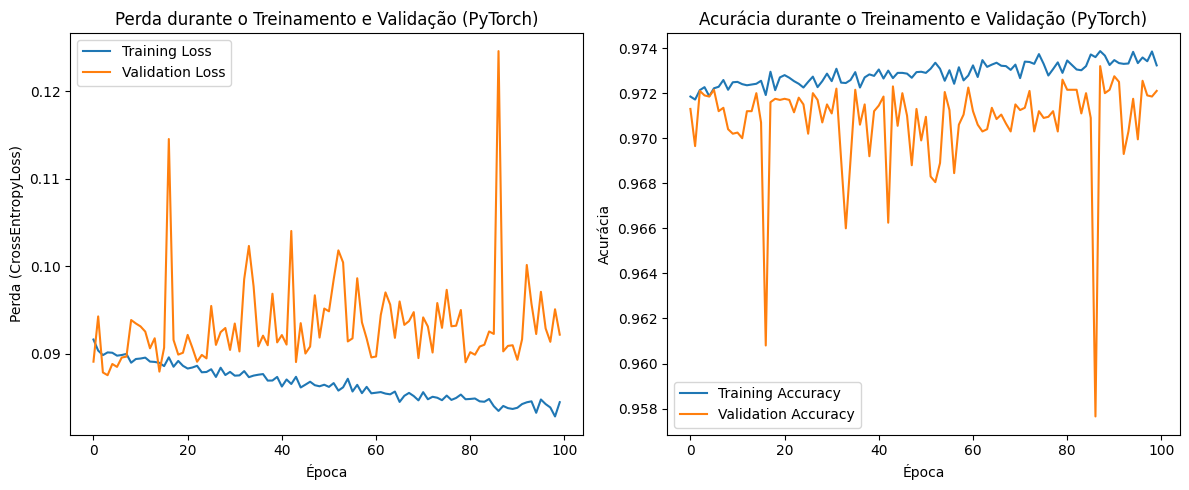

In [10]:
# 1. Dividir em treino, validação e teste
# Primeiro, dividimos em treino + validação e teste
X_train_val_np, X_test_np, y_train_val_np, y_test_np = train_test_split(
    X_scaled, y_indices, test_size=0.2, random_state=42
)

# Em seguida, dividimos o conjunto de treino + validação em treino e validação
X_train_np, X_val_np, y_train_np, y_val_np = train_test_split(
    X_train_val_np, y_train_val_np, test_size=0.25, random_state=42
) # 0.25 * 0.8 = 0.2 do dataset original para validação

# Converter para tensores PyTorch
X_train = torch.from_numpy(X_train_np.astype(np.float32))
y_train = torch.from_numpy(y_train_np.astype(np.longlong))
X_val = torch.from_numpy(X_val_np.astype(np.float32))
y_val = torch.from_numpy(y_val_np.astype(np.longlong))
X_test = torch.from_numpy(X_test_np.astype(np.float32))
y_test = torch.from_numpy(y_test_np.astype(np.longlong))

# Criar DataLoader para treino
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)

# 4. Loop de treinamento com avaliação da validação
num_epochs = 100
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

for epoch in range(num_epochs):
    # Treinamento
    model.train()
    epoch_loss = 0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item() * inputs.size(0)

        _, predicted_indices = torch.max(outputs, 1)
        correct_train += (predicted_indices == labels).sum().item()
        total_train += labels.size(0)

    avg_epoch_loss_train = epoch_loss / len(train_loader.dataset)
    epoch_accuracy_train = correct_train / total_train
    train_losses.append(avg_epoch_loss_train)
    train_accuracies.append(epoch_accuracy_train)

    # Avaliação no conjunto de validação
    model.eval()
    with torch.no_grad():
        outputs_val = model(X_val)
        loss_val = criterion(outputs_val, y_val)
        avg_epoch_loss_val = loss_val.item() # Loss em um lote

        _, predicted_indices_val = torch.max(outputs_val, 1)
        correct_val = (predicted_indices_val == y_val).sum().item()
        total_val = y_val.size(0)
        epoch_accuracy_val = correct_val / total_val

        val_losses.append(avg_epoch_loss_val)
        val_accuracies.append(epoch_accuracy_val)


    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_epoch_loss_train:.4f}, Train Acc: {epoch_accuracy_train:.4f}, Val Loss: {avg_epoch_loss_val:.4f}, Val Acc: {epoch_accuracy_val:.4f}")

# 5. Avaliar o modelo no conjunto de teste (após o treinamento)
model.eval()
with torch.no_grad():
    outputs = model(X_test)
    _, y_predicted_cls = torch.max(outputs, 1)
    accuracy = (y_predicted_cls == y_test).sum().item() / len(y_test)
    print(f"\nAcurácia final no conjunto de teste: {accuracy:.4f}")

# 6. Plotar perda e acurácia para treino e validação
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Perda durante o Treinamento e Validação (PyTorch)')
plt.xlabel('Época')
plt.ylabel('Perda (CrossEntropyLoss)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Acurácia durante o Treinamento e Validação (PyTorch)')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()

plt.tight_layout()
plt.show()

Aumentando o learnig rate, observamos que a acurácua diminuiu para 94% e valor de perda está mais alto, indicando uma influencia considerável no treinamento do modelo.

Epoch [10/100], Loss: 0.1945, Train Accuracy: 0.9448
Epoch [20/100], Loss: 0.1847, Train Accuracy: 0.9465
Epoch [30/100], Loss: 0.1776, Train Accuracy: 0.9476
Epoch [40/100], Loss: 0.1762, Train Accuracy: 0.9499
Epoch [50/100], Loss: 0.1805, Train Accuracy: 0.9461
Epoch [60/100], Loss: 0.1710, Train Accuracy: 0.9504
Epoch [70/100], Loss: 0.1706, Train Accuracy: 0.9496
Epoch [80/100], Loss: 0.1745, Train Accuracy: 0.9504
Epoch [90/100], Loss: 0.1711, Train Accuracy: 0.9501
Epoch [100/100], Loss: 0.1710, Train Accuracy: 0.9532

Acurácia no conjunto de teste: 0.9571


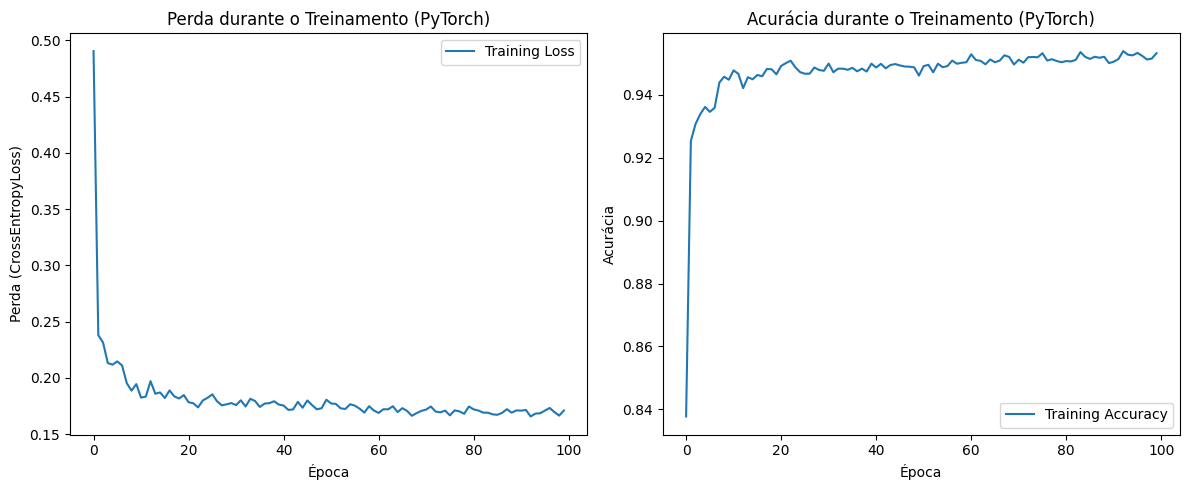

In [12]:
# 2. Definir o modelo
input_features = X_train.shape[1]
num_classes = len(class_mapping)

class StellarClassifier(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(StellarClassifier, self).__init__()
        self.layer1 = nn.Linear(input_dim, 32)
        self.relu1 = nn.ReLU()
        self.layer2 = nn.Linear(32, 16)
        self.relu2 = nn.ReLU()
        self.output_layer = nn.Linear(16, num_classes)

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu1(x)
        x = self.layer2(x)
        x = self.relu2(x)
        x = self.output_layer(x)
        return x

model = StellarClassifier(input_features, num_classes)

# 3. Função de custo e otimizador
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.1)

# 4. Loop de treinamento
num_epochs = 100
train_losses = []
train_accuracies = []

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item() * inputs.size(0)

        _, predicted_indices = torch.max(outputs, 1)
        correct_train += (predicted_indices == labels).sum().item()
        total_train += labels.size(0)

    avg_epoch_loss = epoch_loss / len(train_loader.dataset)
    epoch_accuracy_train = correct_train / total_train
    train_losses.append(avg_epoch_loss)
    train_accuracies.append(epoch_accuracy_train)

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_epoch_loss:.4f}, Train Accuracy: {epoch_accuracy_train:.4f}")

# 5. Avaliar o modelo
model.eval()
with torch.no_grad():
    outputs = model(X_test)
    _, y_predicted_cls = torch.max(outputs, 1)
    accuracy = (y_predicted_cls == y_test).sum().item() / len(y_test)
    print(f"\nAcurácia no conjunto de teste: {accuracy:.4f}")

# 6. Plotar perda e acurácia
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.title('Perda durante o Treinamento (PyTorch)')
plt.xlabel('Época')
plt.ylabel('Perda (CrossEntropyLoss)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.title('Acurácia durante o Treinamento (PyTorch)')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()

plt.tight_layout()
plt.show()


Aumentando o número de épocas e diminuindo o learning rate encontramos uma grande distância entre os valores de treinamento e de validação, indicando overfitting.

Epoch [10/200], Train Loss: 0.1233, Train Acc: 0.9647, Val Loss: 0.1294, Val Acc: 0.9625
Epoch [20/200], Train Loss: 0.1232, Train Acc: 0.9649, Val Loss: 0.1290, Val Acc: 0.9619
Epoch [30/200], Train Loss: 0.1231, Train Acc: 0.9648, Val Loss: 0.1288, Val Acc: 0.9621
Epoch [40/200], Train Loss: 0.1230, Train Acc: 0.9648, Val Loss: 0.1292, Val Acc: 0.9624
Epoch [50/200], Train Loss: 0.1229, Train Acc: 0.9647, Val Loss: 0.1284, Val Acc: 0.9620
Epoch [60/200], Train Loss: 0.1228, Train Acc: 0.9648, Val Loss: 0.1287, Val Acc: 0.9625
Epoch [70/200], Train Loss: 0.1227, Train Acc: 0.9649, Val Loss: 0.1282, Val Acc: 0.9619
Epoch [80/200], Train Loss: 0.1226, Train Acc: 0.9649, Val Loss: 0.1281, Val Acc: 0.9622
Epoch [90/200], Train Loss: 0.1226, Train Acc: 0.9650, Val Loss: 0.1290, Val Acc: 0.9625
Epoch [100/200], Train Loss: 0.1225, Train Acc: 0.9650, Val Loss: 0.1280, Val Acc: 0.9624
Epoch [110/200], Train Loss: 0.1225, Train Acc: 0.9649, Val Loss: 0.1281, Val Acc: 0.9623
Epoch [120/200], Tr

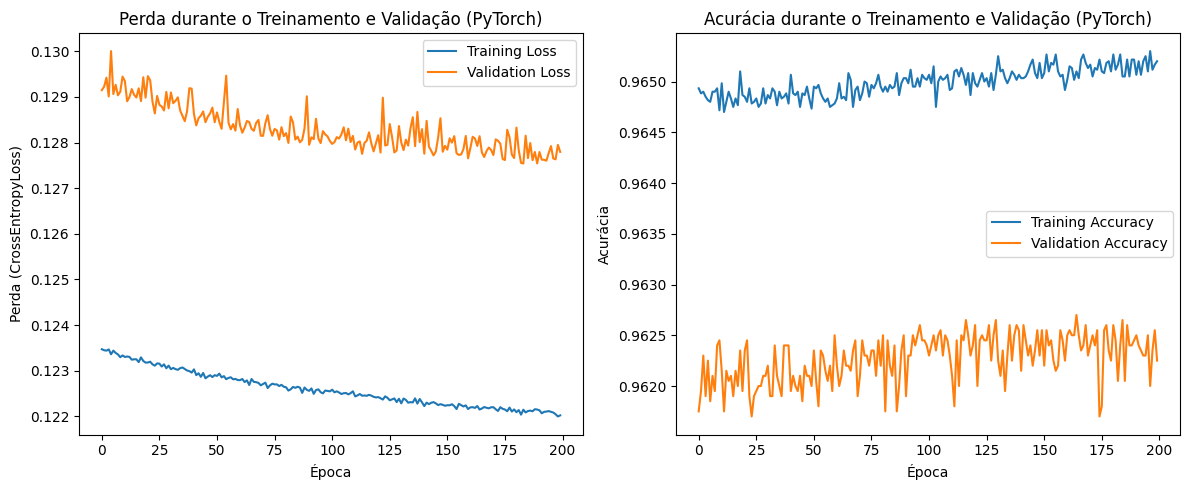

In [14]:
# 1. Dividir em treino, validação e teste
# Primeiro, dividimos em treino + validação e teste
X_train_val_np, X_test_np, y_train_val_np, y_test_np = train_test_split(
    X_scaled, y_indices, test_size=0.2, random_state=42
)

# Em seguida, dividimos o conjunto de treino + validação em treino e validação
X_train_np, X_val_np, y_train_np, y_val_np = train_test_split(
    X_train_val_np, y_train_val_np, test_size=0.25, random_state=42
) # 0.25 * 0.8 = 0.2 do dataset original para validação

# Converter para tensores PyTorch
X_train = torch.from_numpy(X_train_np.astype(np.float32))
y_train = torch.from_numpy(y_train_np.astype(np.longlong))
X_val = torch.from_numpy(X_val_np.astype(np.float32))
y_val = torch.from_numpy(y_val_np.astype(np.longlong))
X_test = torch.from_numpy(X_test_np.astype(np.float32))
y_test = torch.from_numpy(y_test_np.astype(np.longlong))

# Criar DataLoader para treino
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)

# 3. Função de custo e otimizador
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0005)

# 4. Loop de treinamento com avaliação da validação
num_epochs = 200
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

for epoch in range(num_epochs):
    # Treinamento
    model.train()
    epoch_loss = 0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item() * inputs.size(0)

        _, predicted_indices = torch.max(outputs, 1)
        correct_train += (predicted_indices == labels).sum().item()
        total_train += labels.size(0)

    avg_epoch_loss_train = epoch_loss / len(train_loader.dataset)
    epoch_accuracy_train = correct_train / total_train
    train_losses.append(avg_epoch_loss_train)
    train_accuracies.append(epoch_accuracy_train)

    # Avaliação no conjunto de validação
    model.eval()
    with torch.no_grad():
        outputs_val = model(X_val)
        loss_val = criterion(outputs_val, y_val)
        avg_epoch_loss_val = loss_val.item() # Loss em um lote

        _, predicted_indices_val = torch.max(outputs_val, 1)
        correct_val = (predicted_indices_val == y_val).sum().item()
        total_val = y_val.size(0)
        epoch_accuracy_val = correct_val / total_val

        val_losses.append(avg_epoch_loss_val)
        val_accuracies.append(epoch_accuracy_val)


    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_epoch_loss_train:.4f}, Train Acc: {epoch_accuracy_train:.4f}, Val Loss: {avg_epoch_loss_val:.4f}, Val Acc: {epoch_accuracy_val:.4f}")

# 5. Avaliar o modelo no conjunto de teste (após o treinamento)
model.eval()
with torch.no_grad():
    outputs = model(X_test)
    _, y_predicted_cls = torch.max(outputs, 1)
    accuracy = (y_predicted_cls == y_test).sum().item() / len(y_test)
    print(f"\nAcurácia final no conjunto de teste: {accuracy:.4f}")

# 6. Plotar perda e acurácia para treino e validação
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Perda durante o Treinamento e Validação (PyTorch)')
plt.xlabel('Época')
plt.ylabel('Perda (CrossEntropyLoss)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Acurácia durante o Treinamento e Validação (PyTorch)')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()

plt.tight_layout()
plt.show()

Diminuindo o número de épocas e aumentando o learning rate vemos que o modelo foi capaz de aprender, porém não deu tempo de aprender bem, visto a distância dos valores de treino e validação.


Acurácia final no conjunto de teste: 0.9634


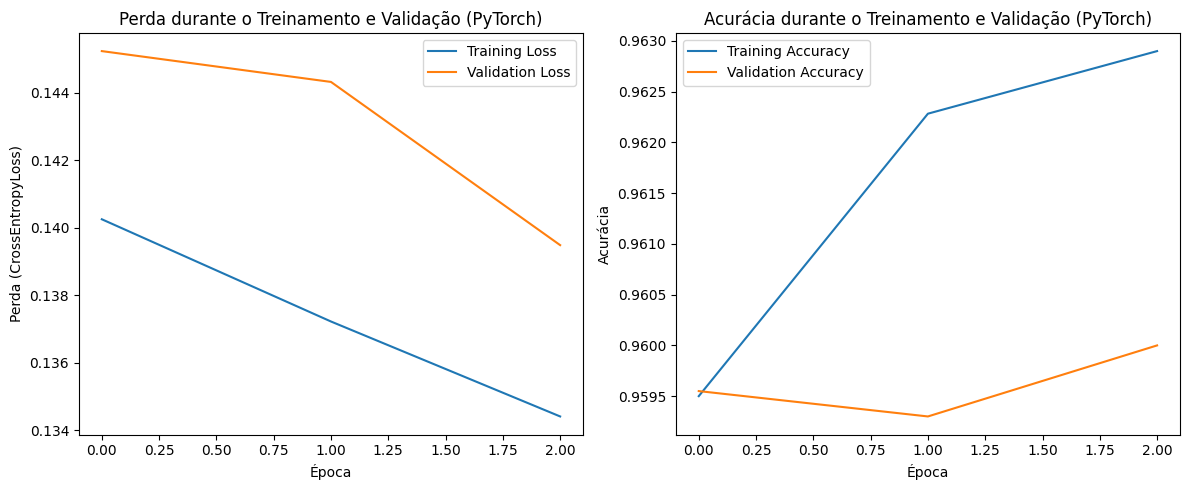

In [18]:
# 1. Dividir em treino, validação e teste
# Primeiro, dividimos em treino + validação e teste
X_train_val_np, X_test_np, y_train_val_np, y_test_np = train_test_split(
    X_scaled, y_indices, test_size=0.2, random_state=42
)

# Em seguida, dividimos o conjunto de treino + validação em treino e validação
X_train_np, X_val_np, y_train_np, y_val_np = train_test_split(
    X_train_val_np, y_train_val_np, test_size=0.25, random_state=42
) # 0.25 * 0.8 = 0.2 do dataset original para validação

# Converter para tensores PyTorch
X_train = torch.from_numpy(X_train_np.astype(np.float32))
y_train = torch.from_numpy(y_train_np.astype(np.longlong))
X_val = torch.from_numpy(X_val_np.astype(np.float32))
y_val = torch.from_numpy(y_val_np.astype(np.longlong))
X_test = torch.from_numpy(X_test_np.astype(np.float32))
y_test = torch.from_numpy(y_test_np.astype(np.longlong))

# Criar DataLoader para treino
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)

# 3. Função de custo e otimizador
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# 4. Loop de treinamento com avaliação da validação
num_epochs = 3
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

for epoch in range(num_epochs):
    # Treinamento
    model.train()
    epoch_loss = 0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item() * inputs.size(0)

        _, predicted_indices = torch.max(outputs, 1)
        correct_train += (predicted_indices == labels).sum().item()
        total_train += labels.size(0)

    avg_epoch_loss_train = epoch_loss / len(train_loader.dataset)
    epoch_accuracy_train = correct_train / total_train
    train_losses.append(avg_epoch_loss_train)
    train_accuracies.append(epoch_accuracy_train)

    # Avaliação no conjunto de validação
    model.eval()
    with torch.no_grad():
        outputs_val = model(X_val)
        loss_val = criterion(outputs_val, y_val)
        avg_epoch_loss_val = loss_val.item() # Loss em um lote

        _, predicted_indices_val = torch.max(outputs_val, 1)
        correct_val = (predicted_indices_val == y_val).sum().item()
        total_val = y_val.size(0)
        epoch_accuracy_val = correct_val / total_val

        val_losses.append(avg_epoch_loss_val)
        val_accuracies.append(epoch_accuracy_val)


    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_epoch_loss_train:.4f}, Train Acc: {epoch_accuracy_train:.4f}, Val Loss: {avg_epoch_loss_val:.4f}, Val Acc: {epoch_accuracy_val:.4f}")

# 5. Avaliar o modelo no conjunto de teste (após o treinamento)
model.eval()
with torch.no_grad():
    outputs = model(X_test)
    _, y_predicted_cls = torch.max(outputs, 1)
    accuracy = (y_predicted_cls == y_test).sum().item() / len(y_test)
    print(f"\nAcurácia final no conjunto de teste: {accuracy:.4f}")

# 6. Plotar perda e acurácia para treino e validação
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Perda durante o Treinamento e Validação (PyTorch)')
plt.xlabel('Época')
plt.ylabel('Perda (CrossEntropyLoss)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Acurácia durante o Treinamento e Validação (PyTorch)')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()

plt.tight_layout()
plt.show()

Modificando a largura e a profundidade, podemos ver que ambos são bons para os dados utilizados. Apesar do modelo de largura maior e profundidade menor ter uma maior acurácia, por ter um nível de complexidade menor - cometendo "mais erros", o modelo menos largo e mais profundo é mais fiel aos valores de validação e têm um desempenho melhor já nas primeiras épocas do treinamento. Normalmente, quando já se tem uma acurácia boa é umportante olhar para outros parametros e ter um modelo mais estável, que aprenda bem e que esteja bem ajustado aos dados.

Epoch [10/50], Train Loss: 0.1142, Train Acc: 0.9663, Val Loss: 0.1227, Val Acc: 0.9644
Epoch [20/50], Train Loss: 0.1034, Train Acc: 0.9692, Val Loss: 0.1073, Val Acc: 0.9695
Epoch [30/50], Train Loss: 0.0988, Train Acc: 0.9700, Val Loss: 0.1162, Val Acc: 0.9620
Epoch [40/50], Train Loss: 0.0952, Train Acc: 0.9712, Val Loss: 0.1051, Val Acc: 0.9683
Epoch [50/50], Train Loss: 0.0927, Train Acc: 0.9720, Val Loss: 0.1034, Val Acc: 0.9702

Acurácia final no conjunto de teste: 0.9704


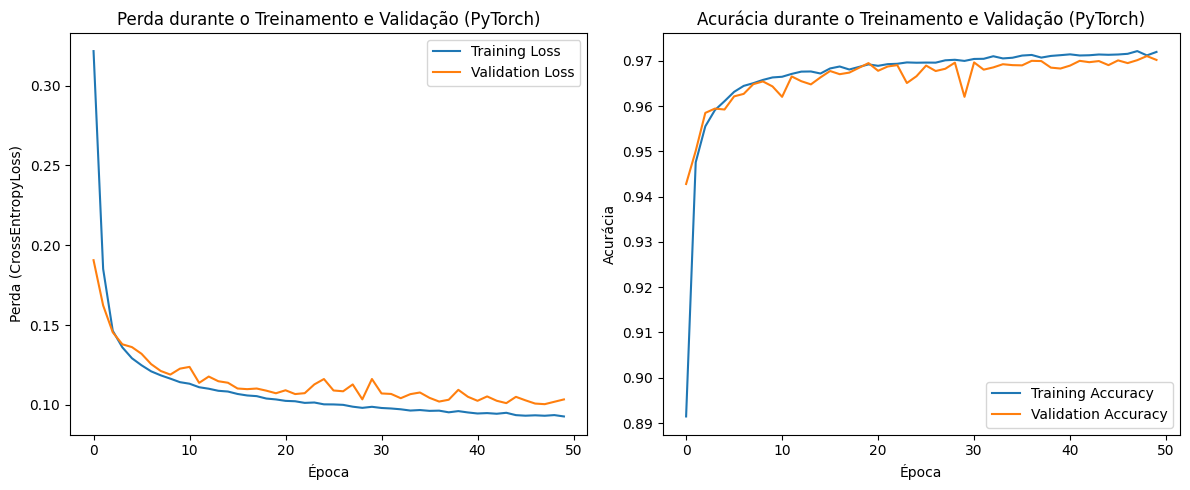

In [27]:
# 1. Dividir em treino, validação e teste
# Primeiro, dividimos em treino + validação e teste
X_train_val_np, X_test_np, y_train_val_np, y_test_np = train_test_split(
    X_scaled, y_indices, test_size=0.2, random_state=42
)

# Em seguida, dividimos o conjunto de treino + validação em treino e validação
X_train_np, X_val_np, y_train_np, y_val_np = train_test_split(
    X_train_val_np, y_train_val_np, test_size=0.25, random_state=42
) # 0.25 * 0.8 = 0.2 do dataset original para validação

# Converter para tensores PyTorch
X_train = torch.from_numpy(X_train_np.astype(np.float32))
y_train = torch.from_numpy(y_train_np.astype(np.longlong))
X_val = torch.from_numpy(X_val_np.astype(np.float32))
y_val = torch.from_numpy(y_val_np.astype(np.longlong))
X_test = torch.from_numpy(X_test_np.astype(np.float32))
y_test = torch.from_numpy(y_test_np.astype(np.longlong))

# Criar DataLoader para treino
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)

# 2. Definir o modelo
input_features = X_train.shape[1]
num_classes = len(class_mapping)

class StellarClassifier(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(StellarClassifier, self).__init__()
        self.layer1 = nn.Linear(input_dim, 128)
        self.relu1 = nn.ReLU()
        self.output_layer = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu1(x)
        x = self.output_layer(x)
        return x

model = StellarClassifier(input_features, num_classes)

# 3. Função de custo e otimizador
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 4. Loop de treinamento com avaliação da validação
num_epochs = 50
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

for epoch in range(num_epochs):
    # Treinamento
    model.train()
    epoch_loss = 0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item() * inputs.size(0)

        _, predicted_indices = torch.max(outputs, 1)
        correct_train += (predicted_indices == labels).sum().item()
        total_train += labels.size(0)

    avg_epoch_loss_train = epoch_loss / len(train_loader.dataset)
    epoch_accuracy_train = correct_train / total_train
    train_losses.append(avg_epoch_loss_train)
    train_accuracies.append(epoch_accuracy_train)

    # Avaliação no conjunto de validação
    model.eval()
    with torch.no_grad():
        outputs_val = model(X_val)
        loss_val = criterion(outputs_val, y_val)
        avg_epoch_loss_val = loss_val.item() # Loss em um lote

        _, predicted_indices_val = torch.max(outputs_val, 1)
        correct_val = (predicted_indices_val == y_val).sum().item()
        total_val = y_val.size(0)
        epoch_accuracy_val = correct_val / total_val

        val_losses.append(avg_epoch_loss_val)
        val_accuracies.append(epoch_accuracy_val)


    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_epoch_loss_train:.4f}, Train Acc: {epoch_accuracy_train:.4f}, Val Loss: {avg_epoch_loss_val:.4f}, Val Acc: {epoch_accuracy_val:.4f}")

# 5. Avaliar o modelo no conjunto de teste (após o treinamento)
model.eval()
with torch.no_grad():
    outputs = model(X_test)
    _, y_predicted_cls = torch.max(outputs, 1)
    accuracy = (y_predicted_cls == y_test).sum().item() / len(y_test)
    print(f"\nAcurácia final no conjunto de teste: {accuracy:.4f}")

# 6. Plotar perda e acurácia para treino e validação
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Perda durante o Treinamento e Validação (PyTorch)')
plt.xlabel('Época')
plt.ylabel('Perda (CrossEntropyLoss)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Acurácia durante o Treinamento e Validação (PyTorch)')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()

plt.tight_layout()
plt.show()

Diminuindo a Largura e aumentando a Profundidade

Epoch [10/50], Train Loss: 0.1154, Train Acc: 0.9651, Val Loss: 0.1143, Val Acc: 0.9663
Epoch [20/50], Train Loss: 0.1084, Train Acc: 0.9677, Val Loss: 0.1219, Val Acc: 0.9624
Epoch [30/50], Train Loss: 0.1042, Train Acc: 0.9692, Val Loss: 0.1091, Val Acc: 0.9683
Epoch [40/50], Train Loss: 0.1024, Train Acc: 0.9690, Val Loss: 0.1125, Val Acc: 0.9656
Epoch [50/50], Train Loss: 0.1009, Train Acc: 0.9695, Val Loss: 0.1246, Val Acc: 0.9619

Acurácia final no conjunto de teste: 0.9610


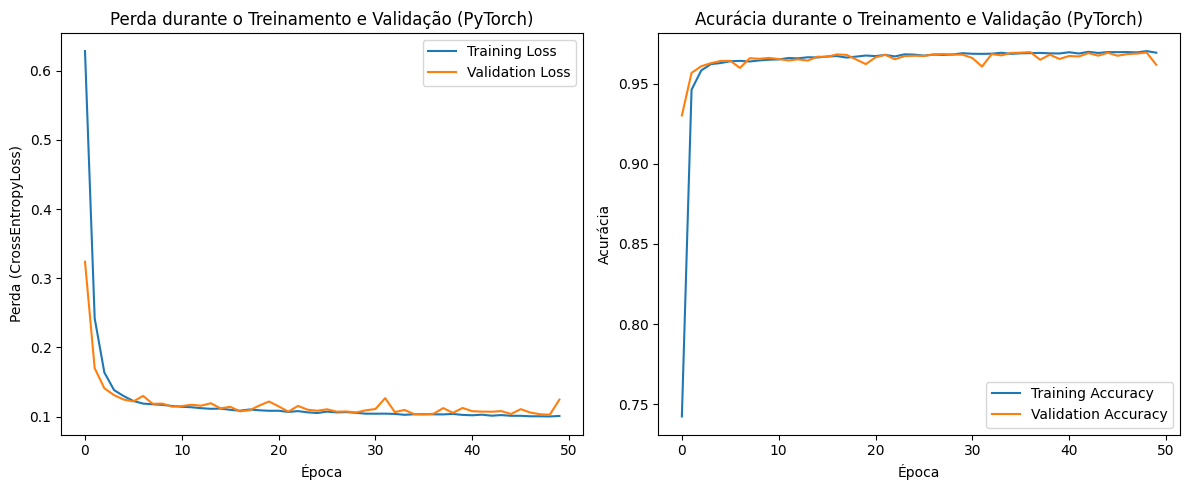

In [26]:
# 1. Dividir em treino, validação e teste
# Primeiro, dividimos em treino + validação e teste
X_train_val_np, X_test_np, y_train_val_np, y_test_np = train_test_split(
    X_scaled, y_indices, test_size=0.2, random_state=42
)

# Em seguida, dividimos o conjunto de treino + validação em treino e validação
X_train_np, X_val_np, y_train_np, y_val_np = train_test_split(
    X_train_val_np, y_train_val_np, test_size=0.25, random_state=42
) # 0.25 * 0.8 = 0.2 do dataset original para validação

# Converter para tensores PyTorch
X_train = torch.from_numpy(X_train_np.astype(np.float32))
y_train = torch.from_numpy(y_train_np.astype(np.longlong))
X_val = torch.from_numpy(X_val_np.astype(np.float32))
y_val = torch.from_numpy(y_val_np.astype(np.longlong))
X_test = torch.from_numpy(X_test_np.astype(np.float32))
y_test = torch.from_numpy(y_test_np.astype(np.longlong))

# Criar DataLoader para treino
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)

# 2. Definir o modelo
input_features = X_train.shape[1]
num_classes = len(class_mapping)

class StellarClassifier(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(StellarClassifier, self).__init__()
        self.layer1 = nn.Linear(input_dim, 16)
        self.relu1 = nn.ReLU()
        self.layer2 = nn.Linear(16, 16)
        self.relu2 = nn.ReLU()
        self.layer3 = nn.Linear(16, 8)
        self.relu3 = nn.ReLU()
        self.layer4 = nn.Linear(8, 4)
        self.relu4 = nn.ReLU()
        self.output_layer = nn.Linear(4, num_classes)

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu1(x)
        x = self.layer2(x)
        x = self.relu2(x)
        x = self.layer3(x)
        x = self.relu3(x)
        x = self.layer4(x)
        x = self.relu4(x)
        x = self.output_layer(x)
        return x

model = StellarClassifier(input_features, num_classes)

# 3. Função de custo e otimizador
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 4. Loop de treinamento com avaliação da validação
num_epochs = 50
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

for epoch in range(num_epochs):
    # Treinamento
    model.train()
    epoch_loss = 0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item() * inputs.size(0)

        _, predicted_indices = torch.max(outputs, 1)
        correct_train += (predicted_indices == labels).sum().item()
        total_train += labels.size(0)

    avg_epoch_loss_train = epoch_loss / len(train_loader.dataset)
    epoch_accuracy_train = correct_train / total_train
    train_losses.append(avg_epoch_loss_train)
    train_accuracies.append(epoch_accuracy_train)

    # Avaliação no conjunto de validação
    model.eval()
    with torch.no_grad():
        outputs_val = model(X_val)
        loss_val = criterion(outputs_val, y_val)
        avg_epoch_loss_val = loss_val.item() # Loss em um lote

        _, predicted_indices_val = torch.max(outputs_val, 1)
        correct_val = (predicted_indices_val == y_val).sum().item()
        total_val = y_val.size(0)
        epoch_accuracy_val = correct_val / total_val

        val_losses.append(avg_epoch_loss_val)
        val_accuracies.append(epoch_accuracy_val)


    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_epoch_loss_train:.4f}, Train Acc: {epoch_accuracy_train:.4f}, Val Loss: {avg_epoch_loss_val:.4f}, Val Acc: {epoch_accuracy_val:.4f}")

# 5. Avaliar o modelo no conjunto de teste (após o treinamento)
model.eval()
with torch.no_grad():
    outputs = model(X_test)
    _, y_predicted_cls = torch.max(outputs, 1)
    accuracy = (y_predicted_cls == y_test).sum().item() / len(y_test)
    print(f"\nAcurácia final no conjunto de teste: {accuracy:.4f}")

# 6. Plotar perda e acurácia para treino e validação
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Perda durante o Treinamento e Validação (PyTorch)')
plt.xlabel('Época')
plt.ylabel('Perda (CrossEntropyLoss)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Acurácia durante o Treinamento e Validação (PyTorch)')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()

plt.tight_layout()
plt.show()

Com a aplicação da regularização L2, diminuição do leaning rate e
aumento dos baches, o modelo ficou menos instável, apesar de ainda haver instabilidade. Por mais que a diferênça nos valores de treino e validação estarem maiores, ainda apresenta uma aprendizagem adequada.

Epoch [10/50], Train Loss: 0.2897, Train Acc: 0.9235, Val Loss: 0.1438, Val Acc: 0.9569
Epoch [20/50], Train Loss: 0.2245, Train Acc: 0.9333, Val Loss: 0.1263, Val Acc: 0.9608
Epoch [30/50], Train Loss: 0.1925, Train Acc: 0.9381, Val Loss: 0.1209, Val Acc: 0.9620
Epoch [40/50], Train Loss: 0.1882, Train Acc: 0.9385, Val Loss: 0.1202, Val Acc: 0.9620
Epoch [50/50], Train Loss: 0.1867, Train Acc: 0.9406, Val Loss: 0.1172, Val Acc: 0.9629

Acurácia final no conjunto de teste: 0.9648


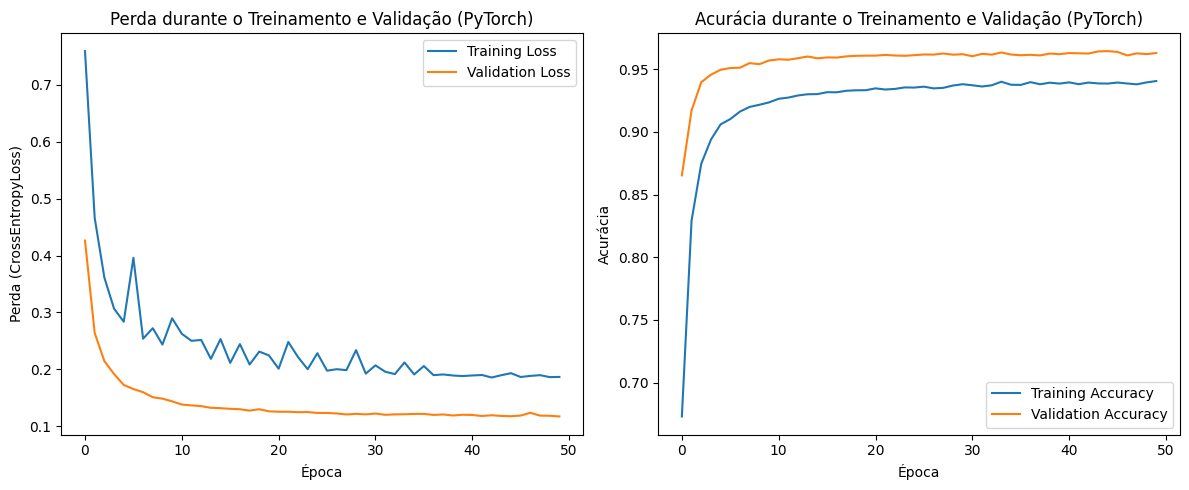

In [30]:
# 1. Dividir em treino, validação e teste
# Primeiro, dividimos em treino + validação e teste
X_train_val_np, X_test_np, y_train_val_np, y_test_np = train_test_split(
    X_scaled, y_indices, test_size=0.2, random_state=42
)

# Em seguida, dividimos o conjunto de treino + validação em treino e validação
X_train_np, X_val_np, y_train_np, y_val_np = train_test_split(
    X_train_val_np, y_train_val_np, test_size=0.25, random_state=42
) # 0.25 * 0.8 = 0.2 do dataset original para validação

# Converter para tensores PyTorch
X_train = torch.from_numpy(X_train_np.astype(np.float32))
y_train = torch.from_numpy(y_train_np.astype(np.longlong))
X_val = torch.from_numpy(X_val_np.astype(np.float32))
y_val = torch.from_numpy(y_val_np.astype(np.longlong))
X_test = torch.from_numpy(X_test_np.astype(np.float32))
y_test = torch.from_numpy(y_test_np.astype(np.longlong))

# Criar DataLoader para treino
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)

# 2. Definir o modelo
input_features = X_train.shape[1]
num_classes = len(class_mapping)

class StellarClassifier(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(StellarClassifier, self).__init__()
        self.layer1 = nn.Linear(input_dim, 32)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.5)
        self.layer2 = nn.Linear(32, 16)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.5)
        self.output_layer = nn.Linear(16, num_classes)

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        x = self.layer2(x)
        x = self.relu2(x)
        x = self.dropout2(x)
        x = self.output_layer(x)
        return x

model = StellarClassifier(input_features, num_classes)

# 3. Função de custo e otimizador
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0005, weight_decay=1e-4)

# 4. Loop de treinamento com avaliação da validação
num_epochs = 50
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

for epoch in range(num_epochs):
    # Treinamento
    model.train()
    epoch_loss = 0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item() * inputs.size(0)

        _, predicted_indices = torch.max(outputs, 1)
        correct_train += (predicted_indices == labels).sum().item()
        total_train += labels.size(0)

    avg_epoch_loss_train = epoch_loss / len(train_loader.dataset)
    epoch_accuracy_train = correct_train / total_train
    train_losses.append(avg_epoch_loss_train)
    train_accuracies.append(epoch_accuracy_train)

    # Avaliação no conjunto de validação
    model.eval()
    with torch.no_grad():
        outputs_val = model(X_val)
        loss_val = criterion(outputs_val, y_val)
        avg_epoch_loss_val = loss_val.item() # Loss em um lote

        _, predicted_indices_val = torch.max(outputs_val, 1)
        correct_val = (predicted_indices_val == y_val).sum().item()
        total_val = y_val.size(0)
        epoch_accuracy_val = correct_val / total_val

        val_losses.append(avg_epoch_loss_val)
        val_accuracies.append(epoch_accuracy_val)


    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_epoch_loss_train:.4f}, Train Acc: {epoch_accuracy_train:.4f}, Val Loss: {avg_epoch_loss_val:.4f}, Val Acc: {epoch_accuracy_val:.4f}")

# 5. Avaliar o modelo no conjunto de teste (após o treinamento)
model.eval()
with torch.no_grad():
    outputs = model(X_test)
    _, y_predicted_cls = torch.max(outputs, 1)
    accuracy = (y_predicted_cls == y_test).sum().item() / len(y_test)
    print(f"\nAcurácia final no conjunto de teste: {accuracy:.4f}")

# 6. Plotar perda e acurácia para treino e validação
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Perda durante o Treinamento e Validação (PyTorch)')
plt.xlabel('Época')
plt.ylabel('Perda (CrossEntropyLoss)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Acurácia durante o Treinamento e Validação (PyTorch)')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()

plt.tight_layout()
plt.show()